### Import the libs

In [10]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

### Import the data from the csv

In [38]:
data = pd.read_csv("framingham.csv")
data.dropna(inplace=True) # there was some NA data, which i just removed
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


### Z-Score normalize the data

In [39]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
data_norm = (data - means)/stds
data_norm

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.119825,-1.233351,1.975752,-0.978352,-0.757068,-0.176951,-0.076008,-0.672698,-0.166831,-0.949714,-1.193695,-1.078415,0.291688,0.356340,-0.203127,-0.423952
1,-0.892997,-0.415591,0.019795,-0.978352,-0.757068,-0.176951,-0.076008,-0.672698,-0.166831,0.297729,-0.514637,-0.159695,0.724614,1.608289,-0.244956,-0.423952
2,1.119825,-0.181945,-0.958183,1.022127,0.921174,-0.176951,-0.076008,-0.672698,-0.166831,0.184325,-0.220378,-0.243215,-0.109261,-0.060977,-0.495930,-0.423952
3,-0.892997,1.336754,0.997773,1.022127,1.760294,-0.176951,-0.076008,1.486551,-0.166831,-0.269291,0.798209,1.009584,0.687717,-0.895610,0.884427,2.358757
4,-0.892997,-0.415591,0.997773,1.022127,1.172910,-0.176951,-0.076008,-0.672698,-0.166831,1.091556,-0.107202,0.090864,-0.660258,0.773656,0.131505,-0.423952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1.119825,0.986285,0.997773,-0.978352,-0.757068,-0.176951,-0.076008,1.486551,-0.166831,-1.131161,0.390774,-0.159695,-0.202734,0.356340,-0.035811,-0.423952
4232,1.119825,2.154514,-0.958183,-0.978352,-0.757068,-0.176951,-0.076008,1.486551,-0.166831,-1.380649,1.613079,1.176624,-0.650419,-1.312926,-0.119469,2.358757
4233,1.119825,0.051701,-0.958183,1.022127,-0.673156,-0.176951,-0.076008,1.486551,-0.166831,1.726618,2.111055,0.759024,0.045707,-0.812146,0.173334,2.358757
4234,1.119825,0.168524,0.997773,1.022127,2.851151,-0.176951,-0.076008,-0.672698,-0.166831,-0.677545,-0.265649,-0.243215,-1.494133,-0.895610,-0.579588,-0.423952


### Mark 90% as training data and 10% as test data

In [228]:
total_datapoints = len(data_norm)
training_data = data_norm[:int(0.9*total_datapoints)].drop(columns="TenYearCHD")
training_target = data[:int(0.9*total_datapoints)]["TenYearCHD"] # keeping the targets non-normed as that gave some serious errors
testing_data = data_norm[int(0.9*total_datapoints):].drop(columns="TenYearCHD")
testing_target = data[int(0.9*total_datapoints):]["TenYearCHD"] # keeping the targets non-normed as that gave some serious errors

### Define the sigmoid function

In [229]:
def sigmoid(z):
	return 1/(1+np.exp(-z))

### Create the gradient descent function

In [224]:
def gradient_descent(x, y, iters, alpha):
	m,n = x.shape
	w = np.zeros(n)
	b = 0.
	hist = np.empty((0,2))

	for i in range(iters):
		err = (sigmoid((x @ w + b)) - y)
		dj_dw = (x.T @ err) / m # matrix multiplication magic
		dj_db = np.sum(err) / m

		w = w - alpha * dj_dw
		b = b - alpha * dj_db

		cost = np.sum(-y * np.log(err+y) - (1 - y) * np.log(1 - (err+y))) / (2*m)
		hist = np.append(hist, [(i,cost)], axis=0)

		# Print cost every at intervals 10 times or as many iterations if < 10
		if i% math.ceil(iters/10) == 0:
			print(f"Iteration {i:9d}, Cost: {cost:0.5e}")
	return w, b, hist

train = np.column_stack((training_data["age"], training_data["sysBP"]))
w, b, hist = gradient_descent(training_data, training_target, 1000, 4) 
# w2, b2, hist = gradient_descent(train, training_target, 1000, 4) 
# w, b, hist = gradient_descent(training_data, training_target, 5000, 1.5e-4) # non-normed data conditions

print(f"\nPredicted w's=\n{w}\nb={b}")

Iteration         0, Cost: 3.46574e-01
Iteration       100, Cost: 1.87097e-01
Iteration       200, Cost: 1.87097e-01
Iteration       300, Cost: 1.87097e-01
Iteration       400, Cost: 1.87097e-01
Iteration       500, Cost: 1.87097e-01
Iteration       600, Cost: 1.87097e-01
Iteration       700, Cost: 1.87097e-01
Iteration       800, Cost: 1.87097e-01
Iteration       900, Cost: 1.87097e-01

Predicted w's=
male               0.262444
age                0.513418
education         -0.046858
currentSmoker      0.028568
cigsPerDay         0.223371
BPMeds             0.027666
prevalentStroke    0.055683
prevalentHyp       0.129188
diabetes           0.002547
totChol            0.096203
sysBP              0.358835
diaBP             -0.082123
BMI                0.073506
heartRate         -0.040011
glucose            0.219653
dtype: float64
b=-1.9927352684647495


### Visualize Cost vs iteration

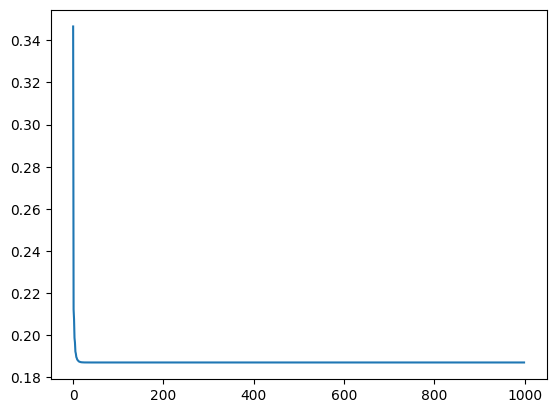

In [231]:
plt.plot(hist[:,0], hist[:,1])

### Targets vs Prediction
(most 1's are misses according to the graphs, but that may really just be data bias, of which an example can be seen in the graph after this one)

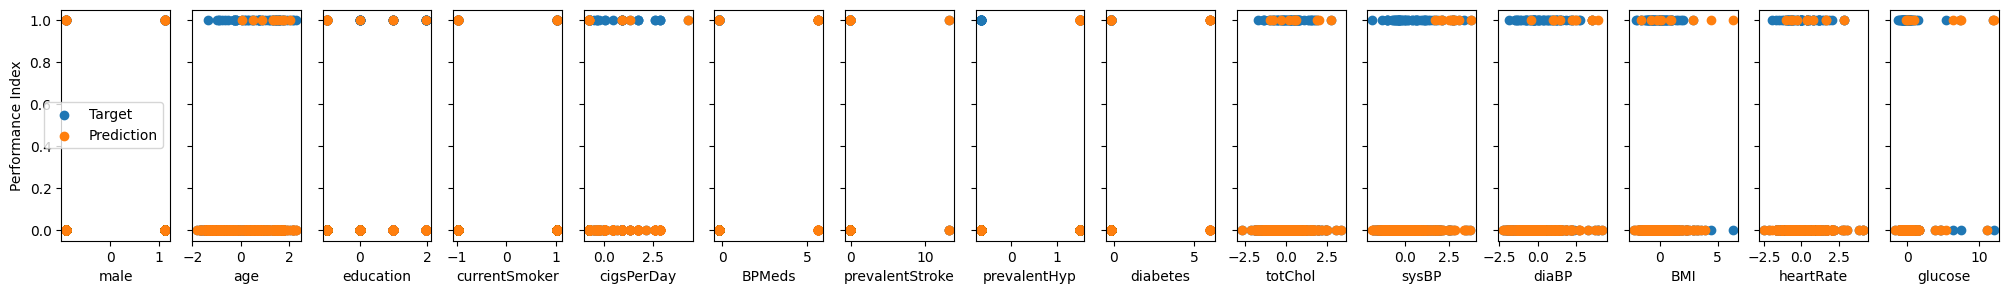

In [226]:
data_pred = np.zeros(total_datapoints)
for i in range(total_datapoints):
	data_pred = (testing_data @ w + b) >= 0

fig,ax=plt.subplots(1, 15, figsize=(25,3), sharey=True)
i = 0
for col in testing_data:
	ax[i].scatter(testing_data[col],testing_target, label="Target")
	ax[i].set_xlabel(col)
	ax[i].scatter(testing_data[col],data_pred, label="Prediction")
	i += 1
ax[0].set_ylabel("Performance Index")
ax[0].legend()
plt.show()

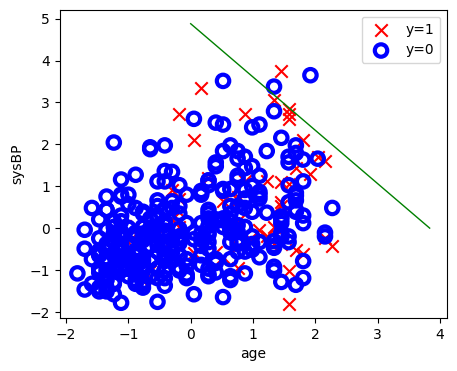

In [219]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.set_ylabel('sysBP')
ax.set_xlabel('age')
X = np.column_stack((testing_data["age"], testing_data["sysBP"]))
y = testing_target
pos = y == 1
neg = y == 0

ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=80, label="y=0", facecolors='none', edgecolors='blue', lw=3)
ax.legend()

x0 = -b2/w2[0]
x1 = -b2/w2[1]								# only taking these 2 columns then running gradient descent on them makes the line for comparison
ax.plot([0,x0],[x1,0], c="green", lw=1)		# As is clearly visible, the data is very biased (although only 2 features) to give y=0 as answer
plt.show()

### Accuracy of predictinos

In [ ]:
accuracy = (1 - np.count_nonzero(data_pred - testing_target) / len(data_pred)) * 100
print(f"Accuracy is {float(accuracy):.3f}%")

TP = FP = FN = TN = 0
	
for pred, actual in zip(data_pred, testing_target):
	if pred == 1 and actual == 1:
		TP += 1
	elif pred == 1 and actual == 0:
		FP += 1
	elif pred == 0 and actual == 1:
		FN += 1
	elif pred == 0 and actual == 0:
		TN += 1

print(f"TP: {TP:3}, FP: {FP:3}\nFN: {FN:3}, TN: {TN:3}") # PS just look at how many negatives there are (quite biased)

Accuracy is 84.153%
TP:   6, FP:   4
FN:  54, TN: 302
